In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from api_keys import api_key
print(api_key)

3ec3d36b56mshc95b8b756087136p1a802cjsn5f03dd87808c


In [4]:
api_key = api_key 

url = "https://mashvisor-api.p.rapidapi.com/trends/cities"

querystring = {"state":"TX","page":"1","items":"20"}

headers = {
	"content-type": "application/octet-stream",
	"X-RapidAPI-Key": api_key,
	"X-RapidAPI-Host": "mashvisor-api.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring).json()

pprint(response)

{'content': {'cities': [{'city': 'San Antonio',
                         'occ_listing': 1299255,
                         'occupancy': 37,
                         'state': 'TX',
                         'total_listing': 35115},
                        {'city': 'Austin',
                         'occ_listing': 793548,
                         'occupancy': 47,
                         'state': 'TX',
                         'total_listing': 16884},
                        {'city': 'Fort Worth',
                         'occ_listing': 763572,
                         'occupancy': 51,
                         'state': 'TX',
                         'total_listing': 14972},
                        {'city': 'Houston',
                         'occ_listing': 618990,
                         'occupancy': 30,
                         'state': 'TX',
                         'total_listing': 20633},
                        {'city': 'Dallas',
                         'occ_listing': 297388,
      

In [15]:
city_data = pd.json_normalize(response["content"]["cities"])
city_data = city_data.sort_values(["occupancy"],ascending=False)
city_data["occupancy"]=city_data["occupancy"]
city_data = city_data.reset_index(drop= True)
city_data_cleaned = city_data.drop(["occ_listing"],axis =1)
city_data_cleaned=city_data_cleaned.rename(columns={'city':"City","state":"State", "occupancy":"Occupancy %","total_listing":"Total Airbnb Listing"})
city_data_cleaned

,City,State,Occupancy %,Total Airbnb Listing
0,Denton,TX,61,451
1,Abilene,TX,53,743
2,Waco,TX,52,2752
3,Fort Worth,TX,51,14972
4,Round Rock,TX,51,614
5,Irving,TX,49,918
6,Austin,TX,47,16884
7,San Marcos,TX,47,1356
8,College Station,TX,43,589
9,South Padre Island,TX,43,902


In [51]:
cities = []
for x in city_data_cleaned:
    city = city_data_cleaned['City']
    cities.append(city)
    
cities

[0                 Denton
 1                Abilene
 2                   Waco
 3             Fort Worth
 4             Round Rock
 5                 Irving
 6                 Austin
 7             San Marcos
 8        College Station
 9     South Padre Island
 10                 Bryan
 11               Lubbock
 12            Richardson
 13           San Antonio
 14            Carrollton
 15               El Paso
 16               Houston
 17                Dallas
 18        Fredericksburg
 19             Galveston
 Name: City, dtype: object,
 0                 Denton
 1                Abilene
 2                   Waco
 3             Fort Worth
 4             Round Rock
 5                 Irving
 6                 Austin
 7             San Marcos
 8        College Station
 9     South Padre Island
 10                 Bryan
 11               Lubbock
 12            Richardson
 13           San Antonio
 14            Carrollton
 15               El Paso
 16               Houston
 17       

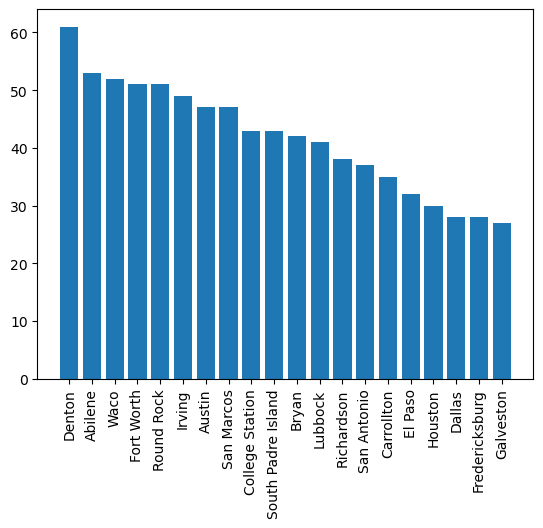

In [39]:
#what city has the highest occupancy rate? show chart 
x_values=city_data_cleaned["City"]
plt.bar(city_data_cleaned["City"],city_data_cleaned["Occupancy %"],alpha = 1, align="center")
plt.xticks(rotation = 90)
plt.show()

In [116]:

url = "https://mashvisor-api.p.rapidapi.com/airbnb-property/occupancy-rates"
room_data=[]
state = "TX"
for x in range(20):
    try:
        city = city_data_cleaned["City"][x]
        
        querystring = {"state": state ,"city": city}
        headers = {
            "content-type": "application/octet-stream",
            "X-RapidAPI-Key": api_key,
            "X-RapidAPI-Host": "mashvisor-api.p.rapidapi.com"
            }
        response_1 = requests.get(url, headers=headers, params=querystring).json()
        studio = response_1["content"]["occupancy_rates"]["studio"]
        print(studio)
        one_bed= response_1["content"]["occupancy_rates"]["one_bedroom"]
        two_bed = response_1["content"]["occupancy_rates"]["two_bedroom"]
        three_bed= response_1["content"]["occupancy_rates"]["three_bedroom"]
        four_bed = response_1["content"]["occupancy_rates"]["four_bedroom"]
        room_data.append(city,studio,one_bed,two_bed,three_bed,four_bed)

    except:
        pass

81
69
51
60
42
62
50
41
55
43
51
55
19
39
56
35
35
41
29
34


In [121]:
room_data

['Galveston', 'Galveston']

In [81]:
citty = []
for city in range(20):

    city = city_data_cleaned["City"]
    citty.append(city)
print(citty)

[0                 Denton
1                Abilene
2                   Waco
3             Fort Worth
4             Round Rock
5                 Irving
6                 Austin
7             San Marcos
8        College Station
9     South Padre Island
10                 Bryan
11               Lubbock
12            Richardson
13           San Antonio
14            Carrollton
15               El Paso
16               Houston
17                Dallas
18        Fredericksburg
19             Galveston
Name: City, dtype: object, 0                 Denton
1                Abilene
2                   Waco
3             Fort Worth
4             Round Rock
5                 Irving
6                 Austin
7             San Marcos
8        College Station
9     South Padre Island
10                 Bryan
11               Lubbock
12            Richardson
13           San Antonio
14            Carrollton
15               El Paso
16               Houston
17                Dallas
18        Fredericksbu

In [ ]:
#occupancy rate vs property type -- show chart ---what is the best size home for rental 

In [ ]:
#amount of listings vs occupancy rate---does a more diluted city effect the occupancy rate

In [ ]:
# pull from real estate api for cities, the property tax info, home sales, size (sq ft vs bedrooms), sales dates 


In [ ]:
#show  homes sold cost vs month and correlation - what month is best to buy a home? 